In [53]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [54]:
def plot_velo_pres_sol(
    p_sol: npt.NDArray[np.float64],
    x_p: npt.NDArray[np.float64],
    y_p: npt.NDArray[np.float64],
    u_x: npt.NDArray[np.float64],
    u_y: npt.NDArray[np.float64],
    x_u: npt.NDArray[np.float64],
    y_u: npt.NDArray[np.float64],
):
    fig, ax = plt.subplots()  # type: ignore
    triang = tri.Triangulation(x_p, y_p)
    # ax.triplot(triang, "bo-", lw=0.2)
    # plot only triangles with sidelength smaller some max_radius
    max_radius = 0.004
    triangles = triang.triangles

    # Mask off unwanted triangles.
    xtri = x_p[triangles] - np.roll(x_p[triangles], 1, axis=1)
    ytri = y_p[triangles] - np.roll(y_p[triangles], 1, axis=1)
    maxi = np.max(np.sqrt(xtri**2 + ytri**2), axis=1)
    triang.set_mask(maxi > max_radius)

    # ax.triplot(triang, color="indigo", lw=2.6)
    ax.tricontour(triang, p_sol, levels=25, linewidths=0.5, colors="k")  # type: ignore
    c_data = ax.tricontourf(triang, p_sol, levels=50, cmap="RdBu_r")  # type: ignore
    fig.colorbar(c_data)  # type: ignore
    # ax.plot(x_p, y_p, "ko")
    arrow_lengths = np.sqrt(u_x**2 + u_y**2)
    pc = ax.quiver(  # type: ignore
        x_u,
        y_u,
        u_x,
        u_y,
        # arrow_lengths,
        # scale=0.0025,
        # scale_units="width",
        # units="width",
        # width=0.0025,
        # headlength=3,
        # headaxislength=3,
        cmap="Greys",
    )
    return fig, ax

In [55]:
pressure_data_const = np.loadtxt("/Users/erikweilandt/Library/Mobile Documents/com~apple~CloudDocs/University/MSc Mathematics Como/master_thesis/nozzles/H0/p240_newtoniano.csv")
velocity_data_const = np.loadtxt("/Users/erikweilandt/Library/Mobile Documents/com~apple~CloudDocs/University/MSc Mathematics Como/master_thesis/nozzles/H0/u240_newtoniano.csv")
# pressure_data_const = np.loadtxt("/Users/erikweilandt/Documents/university/master_thesis/tepem/results/nozzle_-5_0_10_11-22_12-02/p_hr_0_10.csv",delimiter=",")
# velocity_data_const = np.loadtxt("/Users/erikweilandt/Documents/university/master_thesis/tepem/results/nozzle_-5_0_10_11-22_12-02/u_hr_0_10.csv", delimiter=",")
pressure_data_conv = np.loadtxt("/Users/erikweilandt/Documents/university/master_thesis/tepem/results/nozzle_-5_0_10_11-22_12-02/p_hr_-5_10.csv", delimiter=",")
velocity_data_conv = np.loadtxt("/Users/erikweilandt/Documents/university/master_thesis/tepem/results/nozzle_-5_0_10_11-22_12-02/u_hr_-5_10.csv", delimiter=",")


In [56]:
# assign pressure solution
x_p_const = pressure_data_const[:,0]
y_p_const = pressure_data_const[:,1]
p_sol_const = pressure_data_const[:,3]

# assign velocity solution
x_u_const = velocity_data_const[:,0]
y_u_const = velocity_data_const[:,1]
u_x_const = velocity_data_const[:,3]
u_y_const = velocity_data_const[:,4]

In [57]:
# # assign pressure solution
# x_p_const = pressure_data_const[:,1]
# y_p_const = pressure_data_const[:,2]
# p_sol_const = pressure_data_const[:,0]

# # assign velocity solution
# x_u_const = velocity_data_const[:,2]
# y_u_const = velocity_data_const[:,3]
# u_x_const = velocity_data_const[:,0]
# u_y_const = velocity_data_const[:,1]

In [58]:
# # assign pressure solution
# x_p_conv = pressure_data_conv[:,0]
# y_p_conv = pressure_data_conv[:,1]
# p_sol_conv = pressure_data_conv[:,3]

# # assign velocity solution
# x_u_conv = velocity_data_conv[:,0]
# y_u_conv = velocity_data_conv[:,1]
# u_x_conv = velocity_data_conv[:,3]
# u_y_conv = velocity_data_conv[:,4]

In [59]:
# assign pressure solution
x_p_conv = pressure_data_conv[:,1]
y_p_conv = pressure_data_conv[:,2]
p_sol_conv = pressure_data_conv[:,0]

# assign velocity solution
x_u_conv = velocity_data_conv[:,2]
y_u_conv = velocity_data_conv[:,3]
u_x_conv = velocity_data_conv[:,0]
u_y_conv = velocity_data_conv[:,1]

(<Figure size 640x480 with 2 Axes>, <Axes: >)

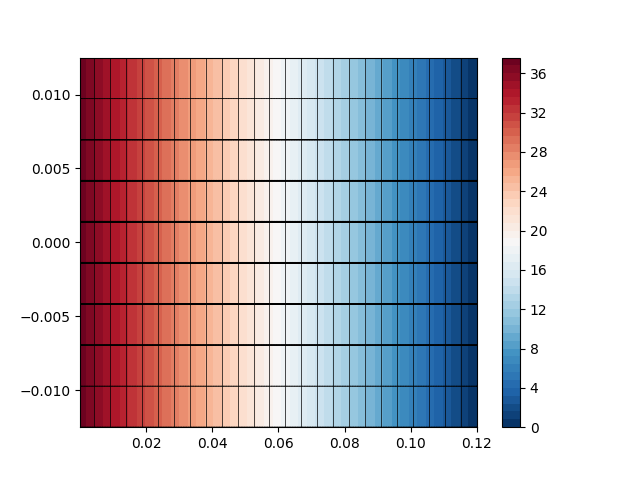

In [60]:
%matplotlib widget
# %matplotlib inline
plot_velo_pres_sol(p_sol_const, x_p_const, y_p_const, u_x_const, u_y_const, x_u_const, y_u_const)

(<Figure size 640x480 with 2 Axes>, <Axes: >)

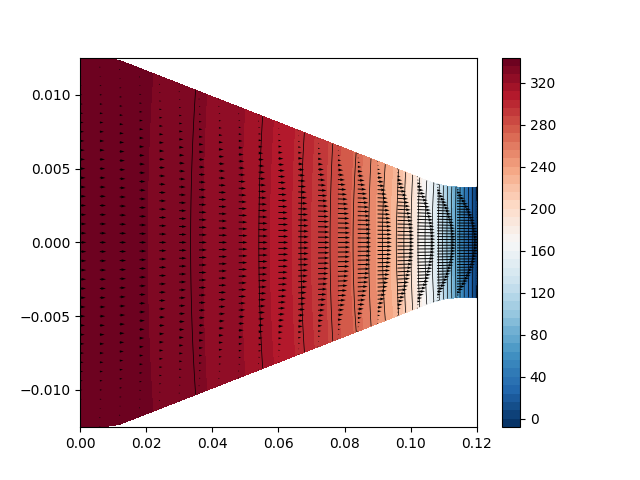

In [61]:
plot_velo_pres_sol(p_sol_conv, x_p_conv, y_p_conv, u_x_conv, u_y_conv, x_u_conv, y_u_conv)

In [62]:
# get initial velocity profile
velocity_data_const[velocity_data_const[:,0] <= 1e-9][:,3], velocity_data_const[velocity_data_const[:,0] <= 1e-9][:,1]


(array([0.       , 0.1185185, 0.2074074, 0.2666667, 0.2962963, 0.2962963,
        0.2666667, 0.2074074, 0.1185185, 0.       ]),
 array([-0.0125    , -0.00972222, -0.00694444, -0.00416667, -0.00138889,
         0.00138889,  0.00416667,  0.00694444,  0.00972222,  0.0125    ]))